In [2]:
library(ggplot2)

In [6]:
# Read the downloaded data
data_file <- "./data/Globicephala_melas.csv"
audiogram <- read.table(data_file, header=TRUE, sep=",")
#head(audiogram)

In [75]:
# Frequency and SPL limits
limits_x <- c(0.01, 100)  # Frequencies from 10Hz to 24kHz
limits_y <- c(-50, 250)  # SPL from -50 to 160 dB


In [76]:
# define the fit function
audiogram.lo <- loess(
    SPL ~ Frequency.in.kHz, 
    audiogram, 
    control = loess.control(surface="direct", statistics="exact"))

# Frequency.in.kHz, in steps of 1 octave, covering the frequency range in limits_x
octaves <- round(log2(limits_x[2]/limits_x[1]))*2
seq <- 2^(seq(log2(limits_x[1]), log2(limits_x[2]), length.out=octaves ))

# Fitted SPL values, with extrapolation to cover the whole filter range
SPL.fit <- predict(audiogram.lo, data.frame(Frequency.in.kHz = seq), se = TRUE)$fit
spl.table <- data.frame(seq, SPL.fit)
colnames(spl.table) <- c("Frequency.in.kHz", "SPL")
spl.table

Frequency.in.kHz,SPL
<dbl>,<dbl>
0.01000000,79.93058
0.01445440,79.92670
0.02089296,79.92109
0.03019952,79.91298
0.04365158,79.90126
0.06309573,79.88433
0.09120108,79.85987
0.13182567,79.82453
0.19054607,79.77349


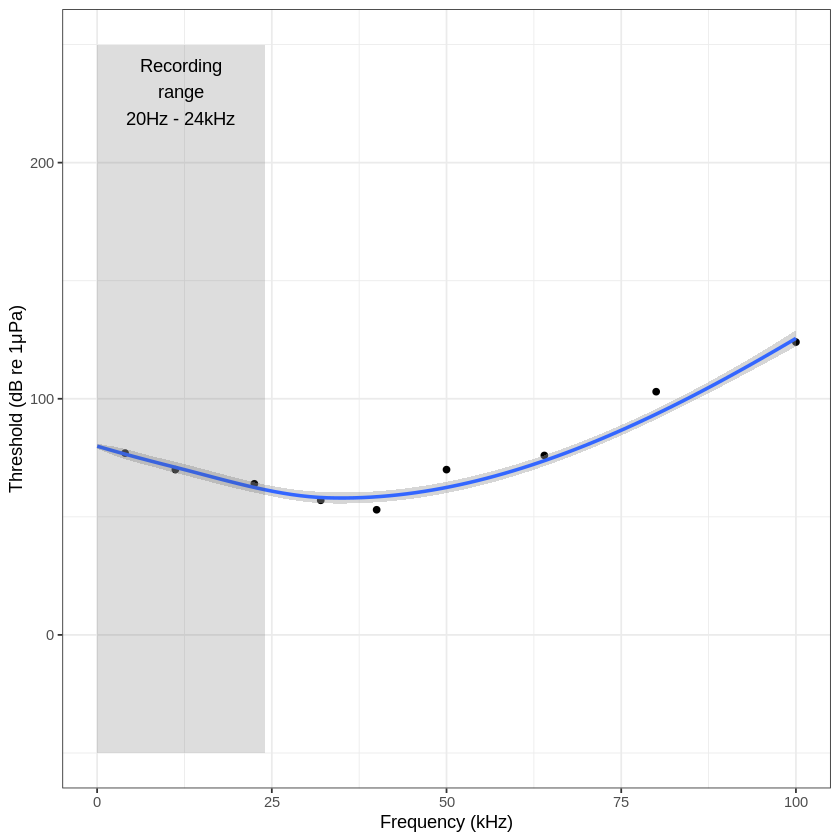

In [78]:

ggplot() +
    geom_point(data=audiogram, aes(Frequency.in.kHz, SPL)) +
    geom_smooth(method=loess, se=TRUE, data=spl.table, aes(Frequency.in.kHz, SPL)) +
    scale_x_continuous(limits=limits_x) +
    scale_y_continuous(limits=limits_y) +
    labs(x="Frequency (kHz)", y="Threshold (dB re 1\u03BCPa)") +
    annotate("rect", xmin=0.02, xmax=24, ymin=limits_y[1], ymax=limits_y[2], alpha=0.2) +
    annotate("text", x=12, y=limits_y[2]-20, label="Recording\nrange\n20Hz - 24kHz")+
    theme_bw()